In [1]:
import numpy as np
import matplotlib.pylab as plt
import librosa.display
import IPython.display
import librosa

In [2]:
def plotAudio3(sig,sr,title):
    
    # this version expects the audio file to have already been opened by librosa
    
    # Adjust the x-axis to represent time
    time=np.arange(0,sig.shape[0])/sr
    
    # Scale the y-axis to represent amplitude from -1 to 1
    excursion=max(abs(sig))
    sigNew = sig / excursion
    
    # Label the x and y axes with variables
    xlabel = 'Time (seconds)'
    ylabel = 'Amplitude'

    # Plot the signal using the x and y axis variables    
    plt.plot(time,sigNew)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

In [3]:
def plotAudioFreqDomain(sig,sr,title,winSize,specType):
    spec = librosa.amplitude_to_db(np.abs(librosa.stft(sig,n_fft=winSize)), ref=np.max)
    librosa.display.specshow(spec, y_axis=specType)
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.show()

In [4]:
def additiveSynthesis(samplingRate,frequency,numHarmonics,seqHarm,ampExponent):

    # generate list of harmonics
    harmonics = np.arange(1,numHarmonics+1,seqHarm)
    
    # create a time series from 0 to 1 the inputted length    
    timeSeries = np.linspace(0, 1, samplingRate)
    
    # create a cosine wave for the fundamental    
    signal = np.cos(2.0 * np.pi * frequency * timeSeries)

    # add harmonics based on the those specified in the variable 'harmonics'
    for harm in harmonics:
        signal = signal + np.cos(2.0 * np.pi * frequency * harm * timeSeries)/harm**ampExponent     
    
    # scale the signal to between -1 and 1
    excursion=max(abs(signal))
    signal = signal / excursion
    
    # plot signal
    plt.plot(timeSeries,signal)
    plt.xlabel('Time (Sec)')
    plt.ylabel('Amplitude')
    plt.title('Additive Synthesis')
    plt.plot
        
    return signal

In [5]:
def  makeWaveforms (samplingRate, frequency, numHarmonics, waveType):
     if waveType == 'sawtooth':
         seqHarm = 1
         ampExponent = 1
     elif waveType == 'square': 
         seqHarm = 2
         ampExponent = 1
     elif waveType == 'triangle':
         seqHarm = 2
         ampExponent = 2
     else: 
         numHarmonics = 1
         seqHarm = 1
         ampExponent = 1
    
     signal = additiveSynthesis(samplingRate,frequency,numHarmonics,seqHarm,ampExponent)
     return signal

In [6]:
def visualizeWaveforms(samplingRate, frequency, numHarmonics, waveType, winSize, specType):
    signal = makeWaveforms (samplingRate, frequency, numHarmonics, waveType)
    plotAudio3(signal,samplingRate,waveType)
    plotAudioFreqDomain(signal,samplingRate,waveType,winSize,specType)
    return signal

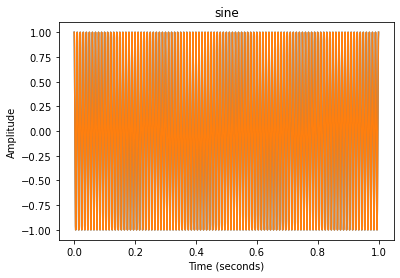

/Users/jaylenbrissett/opt/anaconda3/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/Users/jaylenbrissett/opt/anaconda3/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/Users/jaylenbrissett/opt/anaconda3/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


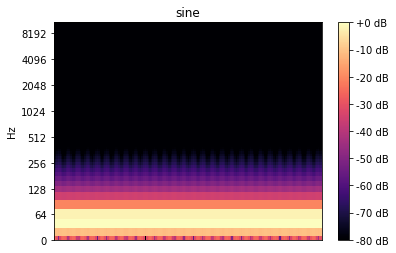

In [7]:
frequency = 100
samplingRate = 44100
numHarmonics = 100
waveType = 'sine'
winSize = 1024
specType = 'log'
signal=visualizeWaveforms(samplingRate, frequency, numHarmonics, waveType, winSize, specType)
IPython.display.Audio(data= signal, rate=samplingRate)

In [8]:
frequency = 100
samplingRate = 44100
numHarmonics = 100
waveType = 'sawtooth'
winSize = 1024
specType = 'log'
IPython.display.Audio(data= signal, rate=samplingRate)